<a href="https://colab.research.google.com/github/jweir136/StockIndicatorsImportances/blob/master/IndicatorsImportanceTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

!pip install -q stockstats

from stockstats import StockDataFrame as Sdf
#stockstats module is used to easily compute technical indicators in a pandas dataframe.

np.random.seed(42)

In [0]:
data = pd.read_csv("AAPL.csv")

stock = Sdf.retype(data)

In [16]:
data['CR'] = stock['cr']
data['kdjk'] = stock['kdjk']
data['kdjd'] = stock['kdjd']
data['kdjj'] = stock['kdjj']
data['open_10_sma'] = stock['open_10_sma']
data['macd'] = stock['macd']
data['boll'] = stock['boll']
data['rsi'] = stock['rsi_10']
data['wr'] = stock['wr_10']
data['cci'] = stock['cci_10']
data['tr'] = stock['tr']
data['dma'] = stock['dma']
data['pdi'] = stock['pdi']
data['mdi'] = stock['mdi']
data['dx'] = stock['dx']
data['vr'] = stock['vr']
data['vr_10_sma'] = stock['vr_10_sma']
data['trix'] = stock['trix']
data['adx'] = stock['adx']
data['adxr'] = stock['adxr']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
data.tail()

,open,high,low,close,adj close,volume,middle,cr,cr-ma1,cr-ma2,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,change,vr,vr_10_sma,trix
date,,,,,,,,,,,,,,,,,,,,,
2018-12-21,156.860001,158.160004,149.630005,150.729996,150.729996,95744600,152.840002,44.585828,49.158493,49.717119,...,78.587502,78.587502,64.833500,64.833500,54.646948,54.646948,-3.889566,46.373632,49.744131,-0.739419
2018-12-24,148.149994,151.550003,146.589996,146.830002,146.830002,37169200,148.323334,44.382665,48.505741,49.016877,...,81.218528,81.218528,69.514937,69.514937,58.894945,58.894945,-2.587404,47.755730,49.444370,-0.777095
2018-12-26,148.300003,157.229996,146.720001,157.169998,157.169998,58582500,153.706665,50.246760,46.598391,48.090164,...,43.267305,43.267305,62.015613,62.015613,59.786564,59.786564,7.042155,49.282203,50.280496,-0.797751
2018-12-27,155.839996,156.770004,150.070007,156.149994,156.149994,53117100,154.330002,47.218775,45.400320,47.377360,...,43.267305,43.267305,56.658954,56.658954,58.892961,58.892961,-0.648981,41.823236,49.392046,-0.806178
2018-12-28,157.500000,158.520004,154.550003,156.229996,156.229996,42232500,156.433334,54.869700,45.438092,46.989349,...,31.933775,31.933775,49.594617,49.594617,56.236292,56.236292,0.051234,49.255917,48.284017,-0.803761


In [18]:
data.isnull().any()

open             False
high             False
low              False
close            False
adj close        False
volume           False
middle           False
cr                True
cr-ma1            True
cr-ma2            True
cr-ma3            True
CR                True
rsv_9            False
kdjk_9           False
kdjk             False
kdjd_9           False
kdjd             False
kdjj_9           False
kdjj             False
open_10_sma      False
close_26_ema     False
macd             False
macds            False
macdh            False
close_20_sma     False
close_20_mstd     True
boll             False
boll_ub           True
boll_lb           True
close_-1_s        True
                 ...  
cci               True
tr                True
close_10_sma     False
close_50_sma     False
dma              False
high_delta        True
um                True
low_delta         True
dm                True
pdm              False
pdm_14_ema       False
pdm_14           False
atr_14     

In [19]:
data.isnull().sum() / len(data)

open             0.000000
high             0.000000
low              0.000000
close            0.000000
adj close        0.000000
volume           0.000000
middle           0.000000
cr               0.000794
cr-ma1           0.003177
cr-ma2           0.004766
cr-ma3           0.007943
CR               0.000794
rsv_9            0.000000
kdjk_9           0.000000
kdjk             0.000000
kdjd_9           0.000000
kdjd             0.000000
kdjj_9           0.000000
kdjj             0.000000
open_10_sma      0.000000
close_26_ema     0.000000
macd             0.000000
macds            0.000000
macdh            0.000000
close_20_sma     0.000000
close_20_mstd    0.000794
boll             0.000000
boll_ub          0.000794
boll_lb          0.000794
close_-1_s       0.000794
                   ...   
cci              0.000794
tr               0.000794
close_10_sma     0.000000
close_50_sma     0.000000
dma              0.000000
high_delta       0.000794
um               0.000794
low_delta   

In [0]:
data.dropna(inplace=True)

In [0]:
X = data.drop(['open', 'high', 'low', 'close', 'adj close', 'volume', 'middle', 'close_-1_s'], axis=1).shift(10).dropna()
y = data['adj close']

trainX, testX, trainY, testY = train_test_split(X.values, y[10:].values, test_size=.2)

In [0]:
rf = RandomForestRegressor(n_estimators=250, verbose=3, n_jobs=-1)

In [32]:
rf.fit(trainX, trainY)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 250building tree 2 of 250

building tree 3 of 250building tree 4 of 250

building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s


building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250
building tree 44 of 250
building tree 45 of 250
building tree 46 of 250
building tree 47 of 250
building tree 48 of 250
building tree 49 of 250
building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250building tree 54 of 250

building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.1s


building tree 126 of 250
building tree 127 of 250
building tree 128 of 250
building tree 129 of 250
building tree 130 of 250
building tree 131 of 250
building tree 132 of 250
building tree 133 of 250
building tree 134 of 250
building tree 135 of 250
building tree 136 of 250
building tree 137 of 250
building tree 138 of 250
building tree 139 of 250
building tree 140 of 250
building tree 141 of 250
building tree 142 of 250
building tree 143 of 250
building tree 144 of 250
building tree 145 of 250
building tree 146 of 250
building tree 147 of 250
building tree 148 of 250
building tree 149 of 250
building tree 150 of 250
building tree 151 of 250
building tree 152 of 250
building tree 153 of 250
building tree 154 of 250
building tree 155 of 250
building tree 156 of 250
building tree 157 of 250
building tree 158 of 250
building tree 159 of 250
building tree 160 of 250
building tree 161 of 250
building tree 162 of 250
building tree 163 of 250
building tree 164 of 250
building tree 165 of 250


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
           oob_score=False, random_state=None, verbose=3, warm_start=False)

In [33]:
rf.score(testX, testY)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.1s finished


0.9952774236058338

In [34]:
for i in range(len(X.keys())):
  print(X.keys()[i], rf.feature_importances_[i] * 100)

cr 0.028031808610252267
cr-ma1 0.060361859207849866
cr-ma2 0.1541831672354518
cr-ma3 0.19376404669410968
CR 0.03899062645798657
rsv_9 0.009980836110466632
kdjk_9 0.014941718922889067
kdjk 0.018731765530634083
kdjd_9 0.06277624347560505
kdjd 0.06435036973668491
kdjj_9 0.009095126043482322
kdjj 0.009335635498842388
open_10_sma 13.548850551916445
close_26_ema 6.485904301459665
macd 0.2239219649279357
macds 0.20378794057917204
macdh 0.1546252605880091
close_20_sma 11.549706338491896
close_20_mstd 0.05009046257736157
boll 9.940144469710631
boll_ub 4.6633407332751915
boll_lb 9.25303610620422
close_-1_d 0.006279537588724156
rs_10 0.06603741958814358
rsi_10 0.060931915813666034
rsi 0.05595117960749639
wr_10 0.012831824168806261
wr 0.010193321362568994
middle_10_sma 13.03872652756115
cci_10 0.00844769731360202
cci 0.008196369942347386
tr 0.009591685122367695
close_10_sma 18.06215427514578
close_50_sma 10.57054905916743
dma 0.1308088010602637
high_delta 0.008561494464175671
um 0.0029338207369576

<Container object of 60 artists>

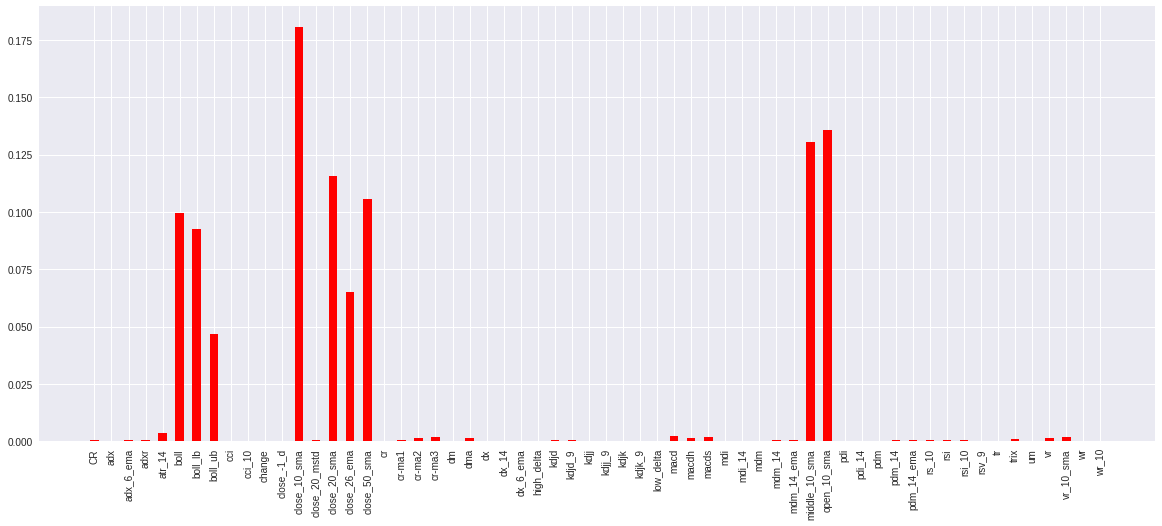

In [35]:
plt.xticks(rotation=90, fontsize=10)
plt.rcParams["figure.figsize"] = (20,8)
plt.bar([a for a in X.keys()], rf.feature_importances_, width=.5, color='red')